# Example4 - Multisetup with Pre Global Estimation Re-scaling (PreGER) method

In this example, we'll be working with a simulated dataset generated from a finite element model of a fictitious three-story, L-shaped building. This model was created using OpenSeesPy, and the corresponding Python script can be found [here](https://github.com/dagghe/pyOMA-test-data/blob/main/test_data/3SL/model.py). 

As always, first we import the necessary modules. All the files needed to run this example are available [here](https://github.com/dagghe/pyOMA-test-data/tree/main/test_data/3SL).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pyoma2.algorithms import SSIdat_MS
from pyoma2.setup import MultiSetup_PreGER
from pyoma2.support.utils.sample_data import get_sample_data

For the **preGER** merging procedure, we adopt a strategy similar to that used for the single setup class. The first step involves instantiating the ```MultiSetup_PreGER``` class and passing the list of datasets, the lists of reference sensors, and their sampling frequency. Similarly to the single setup class, also for the ```MultiSetup_PreGER``` we have access to a wide set of tools to pre-process the data and get more information regarding its quality (e.g. ```decimate_data()```, ```filter_data()```, ```plot_ch_info()``` methods).

2025-01-22 20:27:41,885 - pyoma2.support.utils.sample_data - INFO - set1.npy already exists locally. (sample_data:49)
2025-01-22 20:27:41,889 - pyoma2.support.utils.sample_data - INFO - set2.npy already exists locally. (sample_data:49)
2025-01-22 20:27:41,891 - pyoma2.support.utils.sample_data - INFO - set3.npy already exists locally. (sample_data:49)


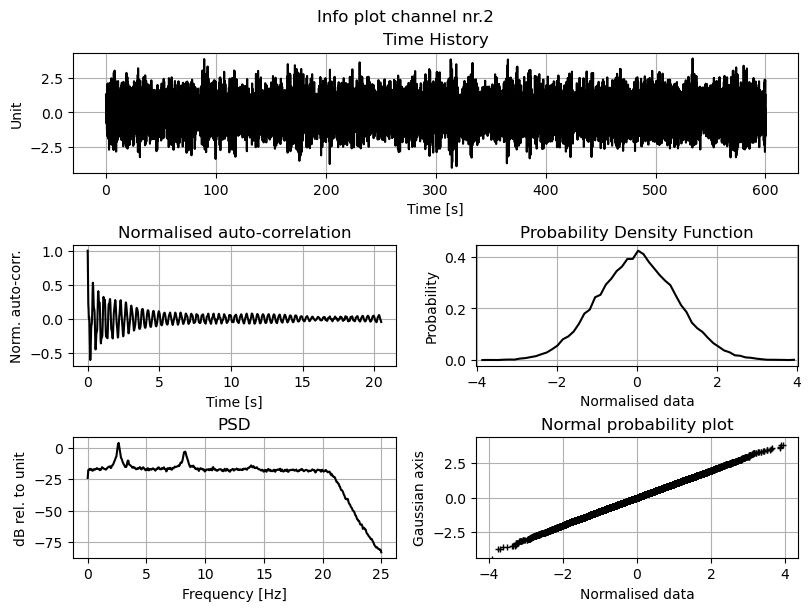

In [2]:
# import data files
set1 = np.load(get_sample_data(filename="set1.npy", folder="3SL"), allow_pickle=True)
set2 = np.load(get_sample_data(filename="set2.npy", folder="3SL"), allow_pickle=True)
set3 = np.load(get_sample_data(filename="set3.npy", folder="3SL"), allow_pickle=True)

# list of datasets and reference indices
data = [set1, set2, set3]
ref_ind = [[0, 1, 2], [0, 1, 2], [0, 1, 2]]

# Create multisetup
msp = MultiSetup_PreGER(fs=100, ref_ind=ref_ind, datasets=data)

# decimate data
msp.decimate_data(q=2)

# Plot TH, PSD and KDE of the (selected) channels of the (selected) datasets
_, _ = msp.plot_ch_info(data_idx=[1], ch_idx=[2])

Again if we want to be able to plot the mode shapes later, then we need to define the geometry of the structure. 

In [3]:
# Geometry 1
_geo1 = get_sample_data(filename="Geo1.xlsx", folder="3SL")
# Geometry 2
_geo2 = get_sample_data(filename="Geo2.xlsx", folder="3SL")

# Define geometry1
msp.def_geo1_by_file(_geo1)
# Define geometry 2
msp.def_geo2_by_file(_geo2)

2025-01-22 20:27:42,259 - pyoma2.support.utils.sample_data - INFO - Geo1.xlsx already exists locally. (sample_data:49)
2025-01-22 20:27:42,260 - pyoma2.support.utils.sample_data - INFO - Geo2.xlsx already exists locally. (sample_data:49)


Now we need to instantiate the multi-setup versions of the algorithms we wish to execute, such as SSIdat.

2025-01-22 20:27:42,357 - pyoma2.setup.base - INFO - Running SSIdat... (base:123)
2025-01-22 20:27:42,370 - pyoma2.functions.ssi - INFO - Assembling Hankel matrix method: dat... (ssi:82)                                                  | 0/3 [00:00<?, ?it/s]
2025-01-22 20:27:43,903 - pyoma2.functions.ssi - INFO - Assembling Hankel matrix method: dat... (ssi:82)                                          | 1/3 [00:01<00:03,  1.53s/it]
2025-01-22 20:27:45,385 - pyoma2.functions.ssi - INFO - Assembling Hankel matrix method: dat... (ssi:82)                                          | 2/3 [00:03<00:01,  1.50s/it]
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 81/81 [00:00<00:00, 22295.49it/s]
2025-01-22 20:27:46,727 - pyoma2.functions.ssi - INFO - Calculating modal parameters for increasing model order... (ssi:484)
100%|████████████████████████████████████████████████████████████████████████████████

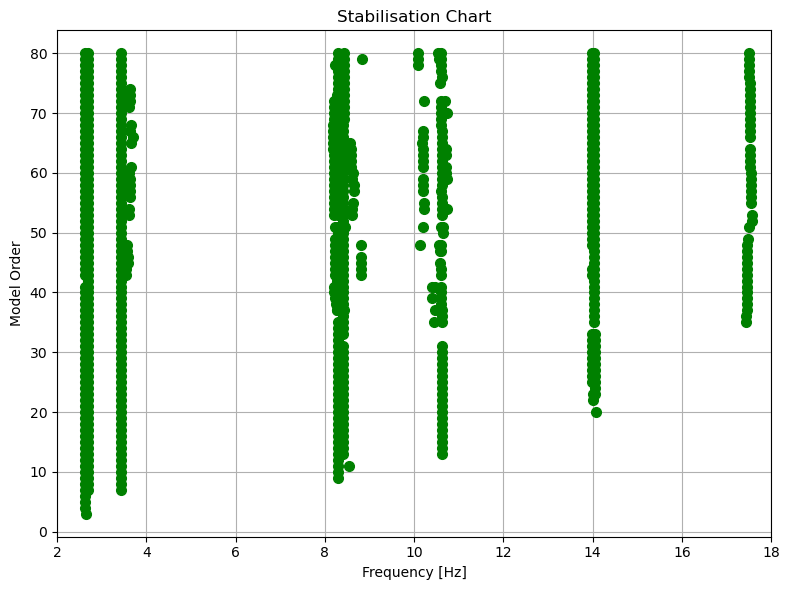

In [4]:
# Initialise the algorithms
ssidat = SSIdat_MS(name="SSIdat", br=80, ordmax=80)

# Add algorithms to the class
msp.add_algorithms(ssidat)
msp.run_all()

# Plot
_, _ = ssidat.plot_stab(freqlim=(2,18))

After the algorithms have been executed we can exctract the desired poles and plot the mode shapes.

2025-01-22 20:28:09,424 - pyoma2.setup.base - INFO - Getting mpe modal parameters from SSIdat (base:149)
2025-01-22 20:28:09,425 - pyoma2.functions.ssi - INFO - Extracting SSI modal parameters (ssi:887)
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 10020.90it/s]
/Users/dagghe/miniforge3/envs/pyOMA2/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/Users/dagghe/miniforge3/envs/pyOMA2/lib/python3.10/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


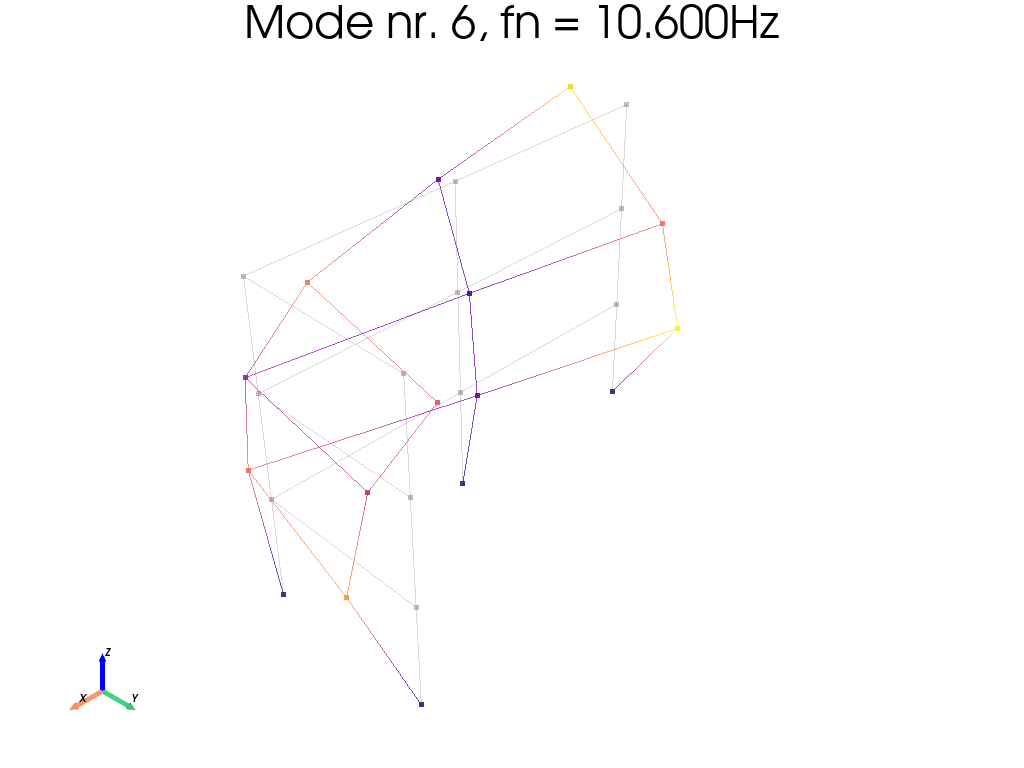

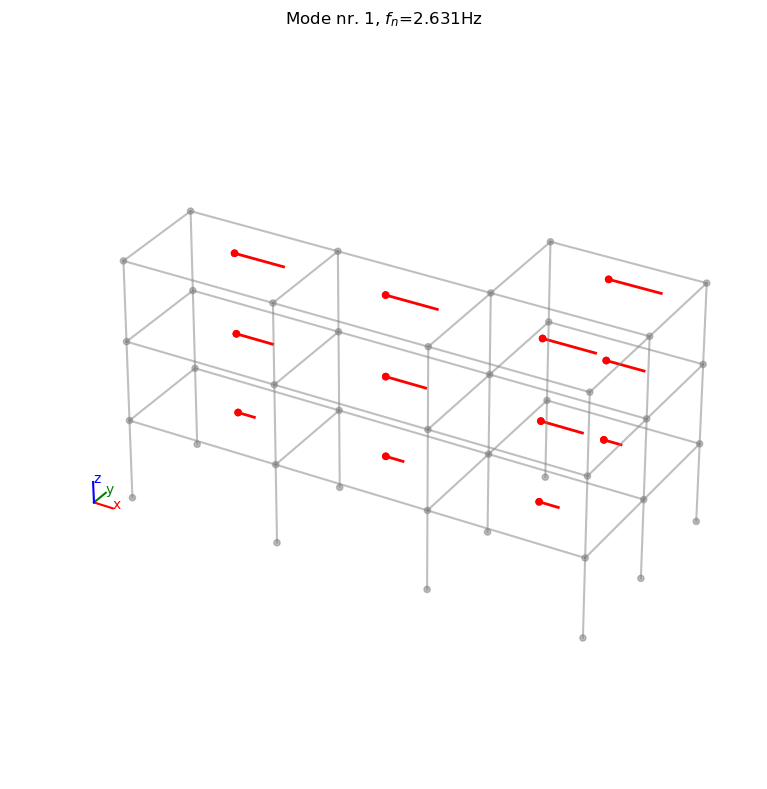

In [6]:
# get modal parameters
msp.mpe(
    "SSIdat",
    sel_freq=[2.63, 2.69, 3.43, 8.29, 8.42, 10.62, 14.00, 14.09, 17.57],
    order_in=80)

# plot mode shapes
_, _ = msp.plot_mode_geo1(algo_res=ssidat.result, mode_nr=1, view="3D", scaleF=2)
_ = msp.plot_mode_geo2(algo_res=ssidat.result, mode_nr=6, scaleF=2, notebook=True)

In [7]:
ssidat.result.Fn

array([ 2.63125782,  2.69635965,  3.42653623,  8.28781744,  8.4216651 ,
       10.59955433, 13.97708409, 14.03198368, 17.50428592])